# tensorflow2教程-CNN变体网络

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.0.0-alpha0


## 1.载入数据

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(60000, 28, 28, 1)   (60000,)
(10000, 28, 28, 1)   (10000,)


## 2.简单的深度网络
如AlexNet,VggNet
![](http://www.hirokatsukataoka.net/research/cnnfeatureevaluation/cnnarchitecture.jpg)

In [3]:
x_shape  = x_train.shape
deep_model = keras.Sequential(
[
    layers.Conv2D(input_shape=((x_shape[1], x_shape[2], x_shape[3])),
                 filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
    
])

In [4]:
deep_model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])
deep_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [5]:
history = deep_model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 72s 1ms/sample - loss: 0.2774 - accuracy: 0.9280 - val_loss: 0.0612 - val_accuracy: 0.9822
Epoch 2/5
54000/54000 [==============================] - 73s 1ms/sample - loss: 0.0646 - accuracy: 0.9802 - val_loss: 0.0516 - val_accuracy: 0.9850
Epoch 3/5
54000/54000 [==============================] - 69s 1ms/sample - loss: 0.0471 - accuracy: 0.9856 - val_loss: 0.0466 - val_accuracy: 0.9883
Epoch 4/5
54000/54000 [==============================] - 70s 1ms/sample - loss: 0.0385 - accuracy: 0.9879 - val_loss: 0.0614 - val_accuracy: 0.9843
Epoch 5/5
54000/54000 [==============================] - 69s 1ms/sample - loss: 0.0317 - accuracy: 0.9897 - val_loss: 0.0463 - val_accuracy: 0.9867


In [6]:
deep_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 219us/sample - loss: 0.0445 - accuracy: 0.9863


[0.04454196666887728, 0.9863]

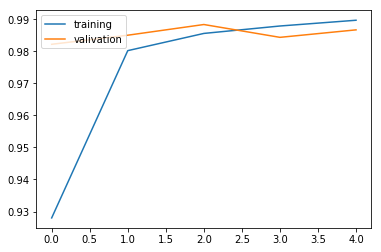

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

In [10]:
result = deep_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 219us/sample - loss: 0.0445 - accuracy: 0.9863


## 3.添加了其它功能层的深度卷积

In [11]:
x_shape  = x_train.shape
deep_model = keras.Sequential(
[
    layers.Conv2D(input_shape=((x_shape[1], x_shape[2], x_shape[3])),
                 filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
    
])

In [12]:
deep_model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_v2 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
batch_normalization_v2_2 (Ba (None, 14, 14, 32)       

In [13]:
history = deep_model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 120s 2ms/sample - loss: 0.2683 - accuracy: 0.9163 - val_loss: 0.0470 - val_accuracy: 0.9880
Epoch 2/5
54000/54000 [==============================] - 114s 2ms/sample - loss: 0.0979 - accuracy: 0.9697 - val_loss: 0.0444 - val_accuracy: 0.9853
Epoch 3/5
54000/54000 [==============================] - 118s 2ms/sample - loss: 0.0718 - accuracy: 0.9780 - val_loss: 0.0358 - val_accuracy: 0.9903
Epoch 4/5
54000/54000 [==============================] - 115s 2ms/sample - loss: 0.0559 - accuracy: 0.9825 - val_loss: 0.0463 - val_accuracy: 0.9887
Epoch 5/5
54000/54000 [==============================] - 115s 2ms/sample - loss: 0.0504 - accuracy: 0.9839 - val_loss: 0.0315 - val_accuracy: 0.9922


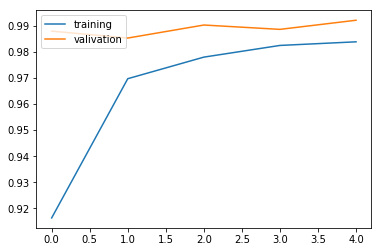

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

In [15]:
result = deep_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 4s 365us/sample - loss: 0.0288 - accuracy: 0.9909


## 4.NIN网络
Min等人在 2013年（https://arxiv.org/abs/1312.4400）提出了减少模型中参数数量的方法之一
即“网络中的网络（NIN）”或“1X1卷积”
方法很简单 - 在其他卷积层之后添加卷积层
具有降低图像空间的维度（深度）的效果，有效地减少了参数的数量
![](https://raw.githubusercontent.com/iamaaditya/iamaaditya.github.io/master/images/conv_arithmetic/full_padding_no_strides_transposed_small.gif)
GoogleNet 中就用到了NIN结构

In [16]:
x_shape  = x_train.shape
deep_model = keras.Sequential(
[
    layers.Conv2D(input_shape=((x_shape[1], x_shape[2], x_shape[3])),
                 filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=16, kernel_size=(1,1), strides=(1,1), padding='valid', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=16, kernel_size=(1,1), strides=(1,1), padding='valid', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
    
])

In [17]:
deep_model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])
deep_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_v2_4 (Ba (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 16)        528       
_________________________________________________________________
batch_normalization_v2_5 (Ba (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_v2_6 (Ba (None, 14, 14, 32)       

In [18]:
history = deep_model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 62s 1ms/sample - loss: 0.2729 - accuracy: 0.9147 - val_loss: 0.0657 - val_accuracy: 0.9818
Epoch 2/5
54000/54000 [==============================] - 63s 1ms/sample - loss: 0.0872 - accuracy: 0.9739 - val_loss: 0.0437 - val_accuracy: 0.9865
Epoch 3/5
54000/54000 [==============================] - 59s 1ms/sample - loss: 0.0657 - accuracy: 0.9800 - val_loss: 0.0404 - val_accuracy: 0.9890
Epoch 4/5
54000/54000 [==============================] - 49s 913us/sample - loss: 0.0535 - accuracy: 0.9834 - val_loss: 0.0622 - val_accuracy: 0.9830
Epoch 5/5
54000/54000 [==============================] - 49s 913us/sample - loss: 0.0441 - accuracy: 0.9860 - val_loss: 0.0435 - val_accuracy: 0.9892


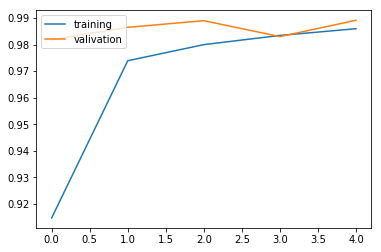

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

In [20]:
result = deep_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 196us/sample - loss: 0.0335 - accuracy: 0.9887
